In [1]:
import torch

In [2]:
scalar = torch.tensor(7)
scalar

tensor(7)

In [3]:
scalar.ndim

0

In [7]:
scalar.item()

7

In [12]:
vector = torch.tensor([4, 5])
vector

tensor([4, 5])

In [13]:
vector.ndim

1

In [14]:
vector.shape

torch.Size([2])

In [24]:
MATRIX = torch.randn(2, 2)
MATRIX

tensor([[ 3.1508,  0.7347],
        [ 0.8736, -0.4661]])

In [25]:
MATRIX.ndim

2

In [26]:
MATRIX.shape

torch.Size([2, 2])

In [27]:
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [28]:
TENSOR.ndim

3

In [29]:
TENSOR.shape

torch.Size([1, 3, 3])

#### Dimensions go outer to inner.

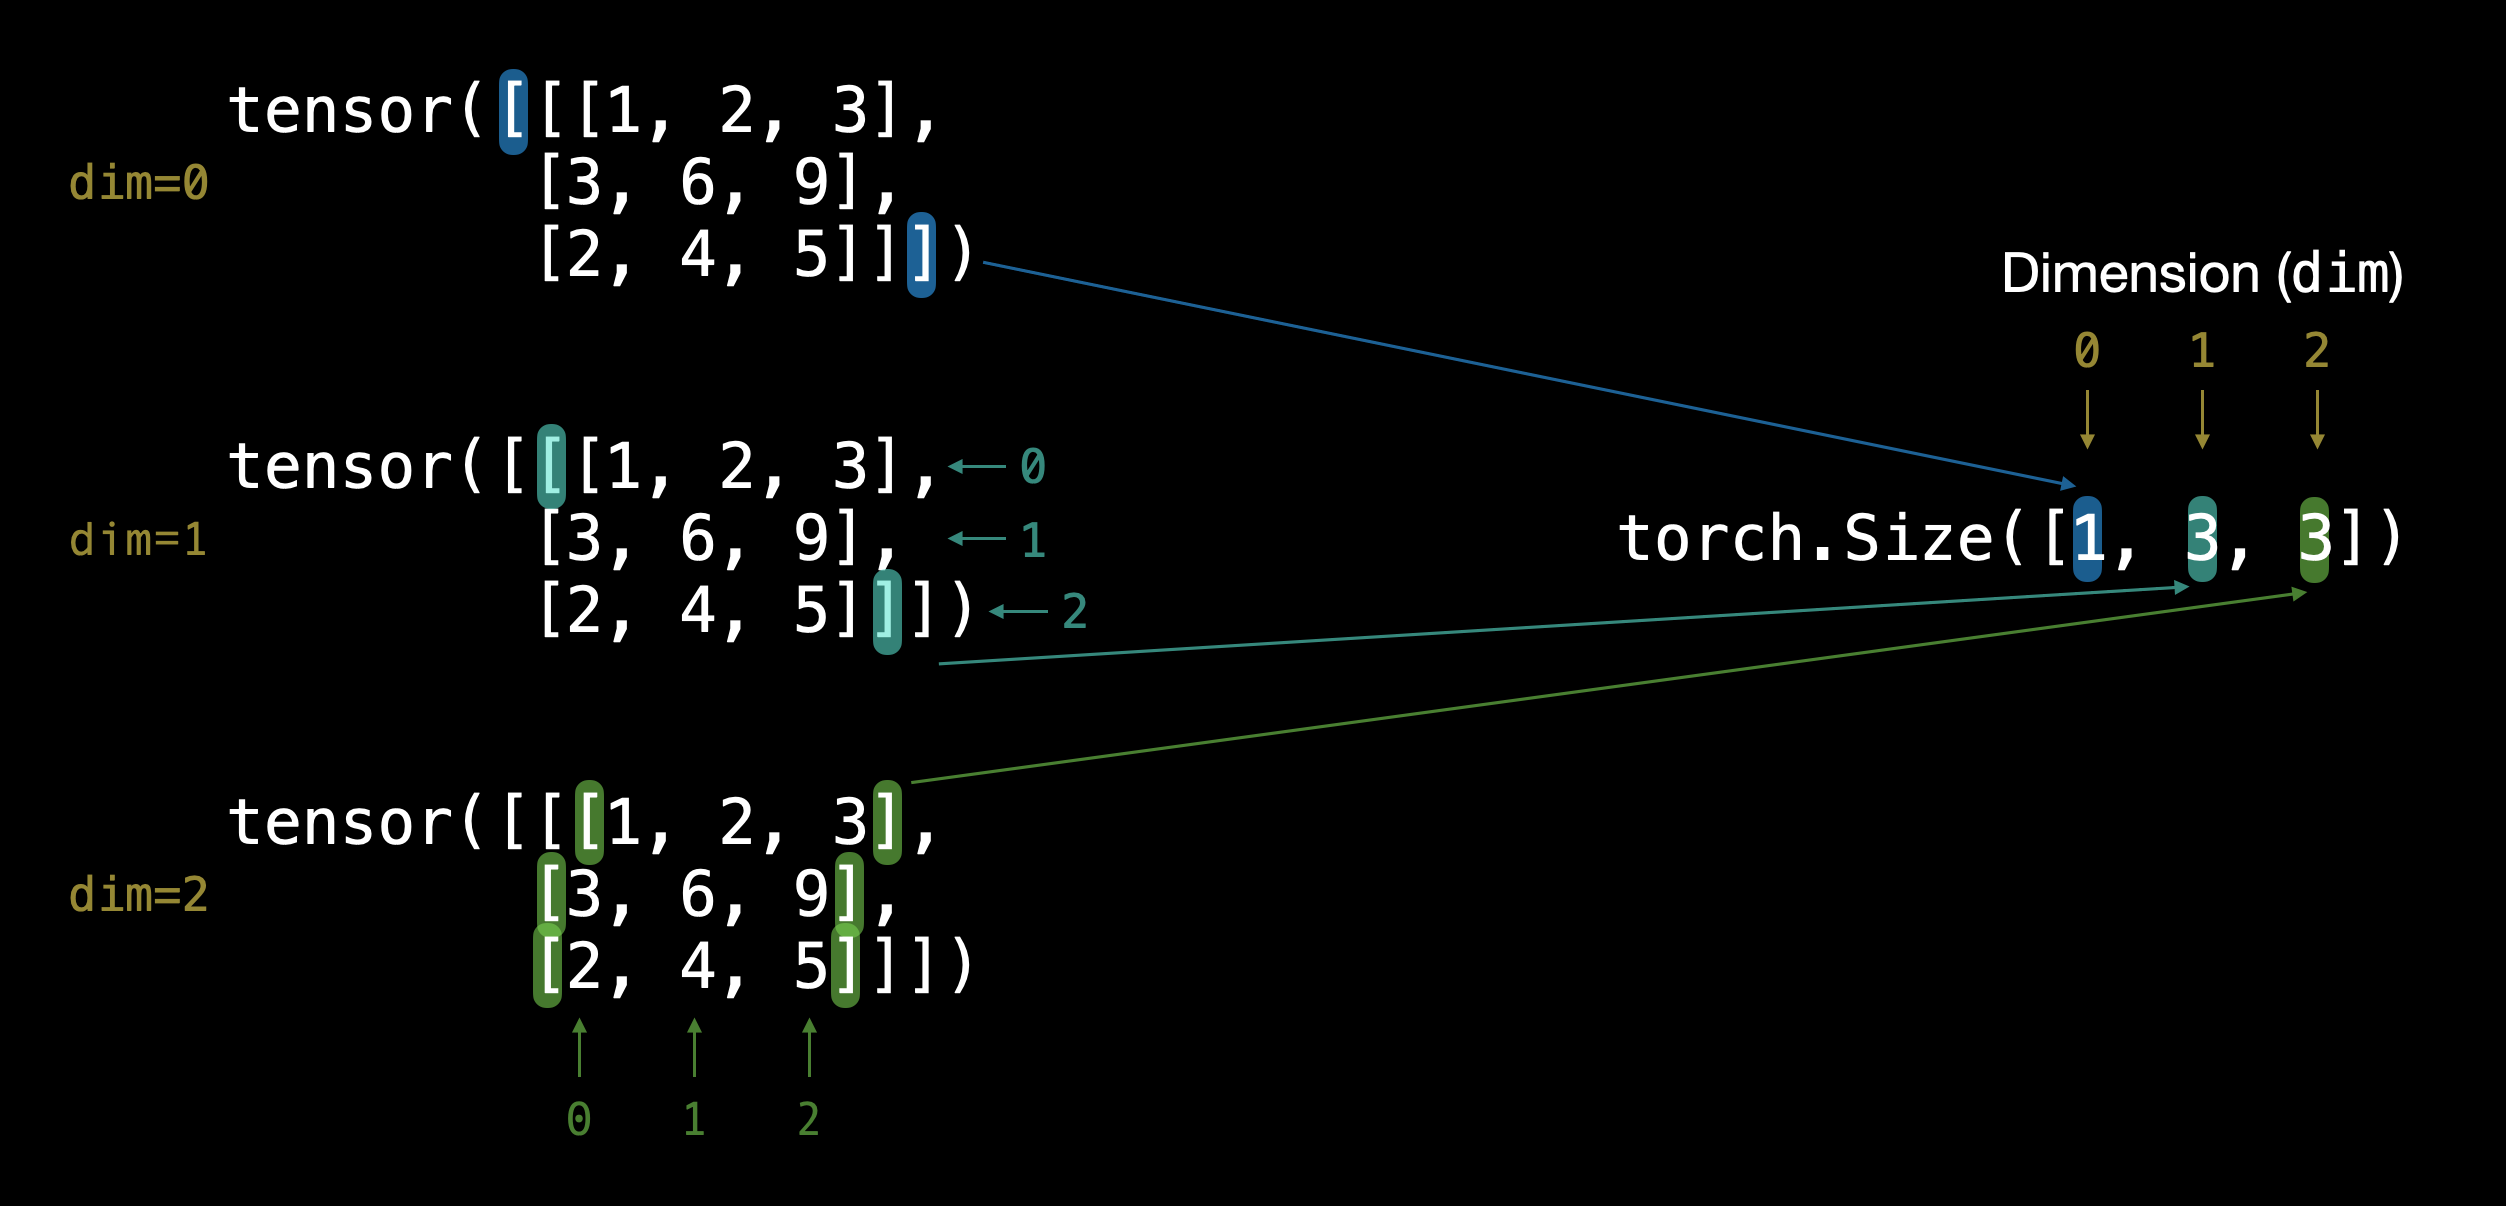

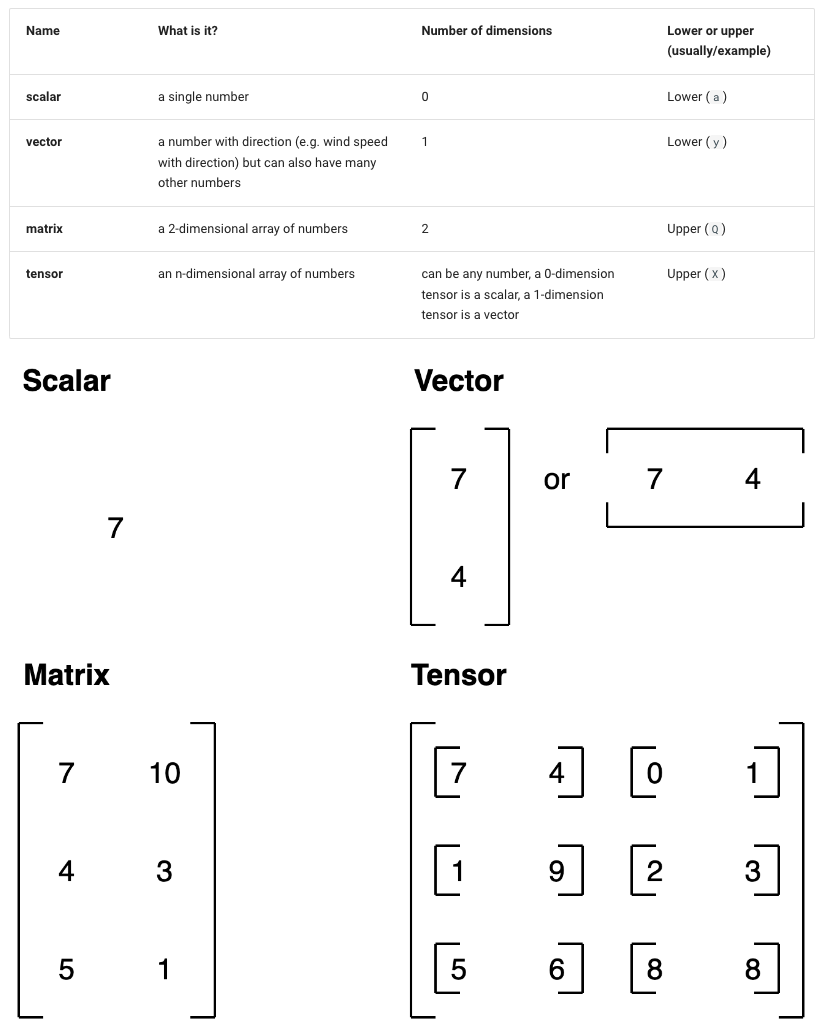

### Random Tensors

In [30]:
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.5293, 0.9905, 0.5691, 0.9114],
         [0.8772, 0.9154, 0.1674, 0.4837],
         [0.7491, 0.6800, 0.4638, 0.9922]]),
 torch.float32)

In [32]:
zeros = torch.zeros(3,4)
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [33]:
ones = torch.ones(3,4)
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

#### Creating a range of numbers

can use: `torch.arange(start, end, step)` where:

- `start` is the starting number
- `end` is the ending number
- `step` is the step size, i.e. the difference between two consecutive numbers

In [34]:
zero_to_38 = torch.arange(0, 38, 1)
zero_to_38

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37])

In [37]:
t8_zeros = torch.zeros_like(zero_to_38)
t8_zeros, t8_zeros.shape

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 torch.Size([38]))

#### Creating tensors with specific datatypes

In [42]:
f32_tensor = torch.rand(1, 3)
f32_tensor, f32_tensor.dtype, f32_tensor.shape, f32_tensor.device

(tensor([[0.3499, 0.4089, 0.0368]]),
 torch.float32,
 torch.Size([1, 3]),
 device(type='cpu'))

In [44]:
f16_tensor = torch.tensor([3.0, 6.0, 9.0],
                          dtype=torch.float16,
                          device=None, # defaults to cpu
                          requires_grad=False)
f16_tensor, f16_tensor.dtype, f16_tensor.shape

(tensor([3., 6., 9.], dtype=torch.float16), torch.float16, torch.Size([3]))

In [45]:
rand_tensor = torch.rand(3, 4)
print(rand_tensor)
print(f"Shape of tensor: {rand_tensor.shape}")
print(f"Datatype of tensor: {rand_tensor.dtype}")
print(f"Device tensor is stored on: {rand_tensor.device}")

tensor([[0.0598, 0.0686, 0.2841, 0.0667],
        [0.0133, 0.3829, 0.6244, 0.4530],
        [0.8080, 0.0029, 0.8504, 0.5712]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Manipulating Tensors

In [50]:
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [51]:
tensor * 10

tensor([10, 20, 30])

In [52]:
tensor - 10

tensor([-9, -8, -7])

In [54]:
torch.mul(tensor, 10)

tensor([10, 20, 30])

However, it's more common to use the operator symbols like * instead of torch.mul()

In [55]:
tensor * tensor

tensor([1, 4, 9])

### Matmul

In [56]:
tensor

tensor([1, 2, 3])

In [57]:
tensor @ tensor

tensor(14)

In [84]:
# doing it manually
tensor

tensor([1, 2, 3])

In [85]:
%%time

value = 0
for i in range(len(tensor)):
        value += tensor[i] * tensor[i]
    
value

CPU times: user 1.5 ms, sys: 1.64 ms, total: 3.14 ms
Wall time: 2.33 ms


tensor(14)

In [86]:
%%time

tensor @ tensor

CPU times: user 112 μs, sys: 91 μs, total: 203 μs
Wall time: 170 μs


tensor(14)

In [87]:
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

In [90]:
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output) 
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


#### Playing around with a linear layer

In [102]:
torch.manual_seed(123)

linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input 
                         out_features=6) # out_features = describes outer value 
x = torch.tensor([[1, 2],
                  [3, 4],
                  [5, 6]], dtype=torch.float32)
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[-0.8416, -0.2469,  0.1746, -1.7773, -0.3457,  0.7310],
        [-1.3715, -0.4160,  0.0062, -3.9295, -0.5989,  0.7376],
        [-1.9013, -0.5850, -0.1621, -6.0818, -0.8520,  0.7443]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


#### Finding the min, max, mean, sum, etc

In [103]:
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [104]:
x.min()

tensor(0)

In [105]:
x.max()

tensor(90)

In [110]:
x.type(torch.float32).mean()

tensor(45.)

In [111]:
x.sum()

tensor(450)

In [114]:
torch.min(x), torch.max(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(0), tensor(90), tensor(45.), tensor(450))

#### change tensor datatype

In [118]:
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

In [119]:
tensor_f16 = tensor.type(torch.float16)
tensor_f16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

In [122]:
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

#### Reshaping, stacking, squeezing and unsqueezing

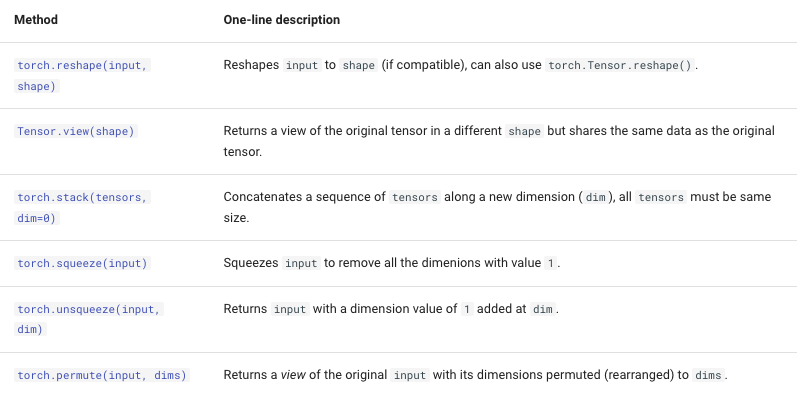

In [125]:
x = torch.arange(1., 8.)
x, x.shape, x.dtype

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]), torch.float32)

In [128]:
# torch.reshape() adding extra dim
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape, x_reshaped.dtype

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]), torch.float32)

In [131]:
# or also:

z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

torch.view is destructive. Even if we create a new tensor like z using x.view, the original tensor x will be modified in place. If we want to keep the original tensor unchanged, we can use x.view_as(y).

In [161]:
# torch.stack()

x_stacked = torch.stack([x, x, x, x, x], dim=0)
x_stacked, x_stacked.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.],
         [1., 2., 3., 4., 5., 6., 7.],
         [1., 2., 3., 4., 5., 6., 7.],
         [1., 2., 3., 4., 5., 6., 7.],
         [1., 2., 3., 4., 5., 6., 7.]]),
 torch.Size([5, 7]))

In [164]:
# torch.squeeze() to remove the dimensions

print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[1., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([1., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


In [172]:
# reverse: torch.unsqueeze()

print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([1., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[1., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


In [177]:
# rearrange the order of axes values with torch.permute(input, dims)

x_original = torch.rand(224, 1024, 3)
x_original.shape

torch.Size([224, 1024, 3])

In [178]:
x_permuted = x_original.permute(2, 0, 1)
x_permuted.shape

torch.Size([3, 224, 1024])

Note: permuting returns a view (sharing the same data as the original tensor), not a new tensor. So if the values in x_permuted are changed, the values in x will also change.

#### Indexing

In [185]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [193]:
x[0] # outermost

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [195]:
x[:, 0] # all values of 0th dim (outermost), 0 index of dim 1

tensor([[1, 2, 3]])

In [197]:
x[:, :, 0] # all values of 0th dim (outermost), all values of dim 1, 0 index of dim 2

tensor([[1, 4, 7]])

In [203]:
x[:, 1, 2] # all values of 0th dim (outermost), but only 1 index of dim 1, and 2 index of dim 2

tensor([6])

In [204]:
x[0, 0, :]

tensor([1, 2, 3])

#### PyTorch tensors & NumPy

to be continued later.